In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import illustris_python as il

In [2]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['Group_R_Crit200', 'GroupSFR', 'GroupMassType']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [3]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloSFR' ,'SubhaloStellarPhotometrics', 'SubhaloMassType', 'SubhaloGrNr']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [4]:
h = 0.6774

In [5]:
df = pd.read_pickle('../generate_catalog/group_number_cat.pkl')

In [6]:
df.keys()

dict_keys(['05FossilR200', '05M200_F_R200', '05R200_F_R200', '05NFossilR200', '05M200_NF_R200', '05R200_NF_R200', '1FossilR200', '1M200_F_R200', '1R200_F_R200', '1NFossilR200', '1M200_NF_R200', '1R200_NF_R200', '3FossilR200', '3M200_F_R200', '3R200_F_R200', '3NFossilR200', '3M200_NF_R200', '3R200_NF_R200', '05FossilISO', '05M200_F_ISO', '05R200_F_ISO', '1FossilISO', '1M200_F_ISO', '1R200_F_ISO', '3FossilISO', '3M200_F_ISO', '3R200_F_ISO'])

In [9]:
F05r200 = df['05FossilR200']
NF05r200 = df['05NFossilR200']

In [10]:
Fr200 = df['1FossilR200']
NFr200 = df['1NFossilR200']

In [11]:
sstarforming = []
Nsstarforming = []
stellarmass = []
Nstellarmass = []

for i in (range(len(F05r200))):
    a = halos['GroupSFR'][F05r200[i]]/((halos['GroupMassType'][F05r200[i],4]/h)*10**10)
    sstarforming.append(a)

for i in (range(len(NF05r200))):
    b = halos['GroupSFR'][NF05r200[i]]/((halos['GroupMassType'][NF05r200[i],4]/h)*10**10)
    Nsstarforming.append(b) 

In [12]:
F1sstarforming = []
NF1sstarforming = []
F1stellarmass = []
NF1stellarmass = []

for i in (range(len(Fr200))):
    a = (halos['GroupSFR'][Fr200[i]]/(halos['GroupMassType'][Fr200[i],4]))*h/(10**10)
    F1sstarforming.append(a)

for i in (range(len(NFr200))):
    b = (halos['GroupSFR'][NFr200[i]]/(halos['GroupMassType'][NFr200[i],4]))*h/(10**10)
    NF1sstarforming.append(b)

In [13]:
sstarforming = np.log10(sstarforming)
Nsstarforming = np.log10(Nsstarforming)

F1sstarforming = np.log10(F1sstarforming)
NF1sstarforming = np.log10(Nsstarforming)

/tmp/ipykernel_279/1261754494.py:5: RuntimeWarning: invalid value encountered in log10
  NF1sstarforming = np.log10(Nsstarforming)


In [14]:
mediansSFR = np.median(sstarforming)
nmedianNsSFR = np.median(Nsstarforming)

mediansF1SFR = np.median(F1sstarforming)
nmedianNF1sSFR = np.median(NF1sstarforming)

In [15]:
weight_fossil = np.ones_like(sstarforming)/float(len(F05r200))
weight_nonfossil = np.ones_like(Nsstarforming)/float(len(NF05r200))
bins = np.arange(0,1,0.05)

In [16]:
weight_fossil_1 = np.ones_like(F1sstarforming)/float(len(Fr200))
weight_nonfossil_1 = np.ones_like(NF1sstarforming)/float(len(NFr200))
bins_1 = np.arange(0,1,0.05)

In [17]:
init1 = min(Nsstarforming)
maxim1 = max(Nsstarforming)
init2 = min(sstarforming)
maxim2 = max(sstarforming)

In [18]:
bins1_sfr05 = np.linspace(init2, maxim1, num=len(Nsstarforming))
bins2_sfr05 = np.linspace(init2, maxim1,num=len(sstarforming))

In [19]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [20]:
print(ks_2samp(sstarforming, Nsstarforming))
print(ks_2samp(sstarforming, Nsstarforming, alternative='less'))

KstestResult(statistic=0.13009619789280807, pvalue=0.4816777129315135, statistic_location=-10.763392939343138, statistic_sign=1)
KstestResult(statistic=0.008550923805161093, pvalue=0.9870386307630612, statistic_location=-10.454391180346287, statistic_sign=-1)


In [21]:
stellar_mass = np.log10((subhalos['SubhaloMassType'][:,4])/h) +10
gals = np.nonzero(stellar_mass > 9.5)[0]

/tmp/ipykernel_279/3601298107.py:1: RuntimeWarning: divide by zero encountered in log10
  stellar_mass = np.log10((subhalos['SubhaloMassType'][:,4])/h) +10


In [22]:
sstarforming_each = []
Nsstarforming_each = []

for i in range(len(F05r200)):
    sstarforming_each.append([])
for i in range(len(NF05r200)):
    Nsstarforming_each.append([])

for i in range(len(F05r200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == F05r200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        sstarforming_each[i].append(a)

for i in range(len(NF05r200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == NF05r200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        Nsstarforming_each[i].append(b)

/tmp/ipykernel_279/1548686978.py:13: RuntimeWarning: invalid value encountered in scalar divide
  a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
/tmp/ipykernel_279/1548686978.py:20: RuntimeWarning: invalid value encountered in scalar divide
  b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])


In [23]:
F1sstarforming_each = []
NF1sstarforming_each = []

for i in range(len(Fr200)):
    F1sstarforming_each.append([])
for i in range(len(NFr200)):
    NF1sstarforming_each.append([])

for i in range(len(Fr200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == Fr200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        F1sstarforming_each[i].append(a)

for i in range(len(NFr200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == NFr200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        NF1sstarforming_each[i].append(b)

/tmp/ipykernel_279/1305369.py:13: RuntimeWarning: invalid value encountered in scalar divide
  a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
/tmp/ipykernel_279/1305369.py:20: RuntimeWarning: invalid value encountered in scalar divide
  b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])


In [24]:
QF_f=[]
QF_nf=[]
for i in range(len(F05r200)):
    a = np.where(np.array(sstarforming_each[i]) == 0)[0]
    QF_f.append(len(a)/len(sstarforming_each[i]))

for i in range(len(NF05r200)):
    a = np.where(np.array(Nsstarforming_each[i]) == 0)[0]
    QF_nf.append(len(a)/len(Nsstarforming_each[i]))
#nonfossil['Nsstarforming_each']

In [25]:
QF_f1=[]
QF_nf1=[]
for i in range(len(Fr200)):
    a = np.where(np.array(F1sstarforming_each[i]) == 0)[0]
    QF_f1.append(len(a)/len(F1sstarforming_each[i]))

for i in range(len(NFr200)):
    a = np.where(np.array(NF1sstarforming_each[i]) == 0)[0]
    QF_nf1.append(len(a)/len(NF1sstarforming_each[i]))
#nonfossil['NF1sstarforming_each']

In [26]:
medianQF = np.median(QF_f)
mediannQF = np.median(QF_nf)

meanQF = np.mean(QF_f)
meannQF = np.mean(QF_nf)

In [27]:
medianQF1 = np.median(QF_f1)
mediannQF1 = np.median(QF_nf1)

meanQF1 = np.mean(QF_f1)
meannQF1 = np.mean(QF_nf1)

In [28]:
weight_fossil = np.ones_like(QF_f)/len(F05r200)
weight_nonfossil = np.ones_like(QF_nf)/len(NF05r200)
#bins= np.arange(0, 1, 0.025)
bins= int(1 + np.log2(len(F05r200)+len(NF05r200)))


In [29]:
weight_fossil_1 = np.ones_like(QF_f1)/len(Fr200)
weight_nonfossil_1 = np.ones_like(QF_nf1)/len(NFr200)
#bins= np.arange(0, 1, 0.025)
bins_1 = int(1 + np.log2(len(Fr200)+len(NFr200)))

(array([[0.25263158, 0.42105263, 1.43157895, 1.17894737, 1.68421053,
         1.43157895, 1.17894737, 0.42105263],
        [0.66666667, 0.38095238, 0.85714286, 0.85714286, 2.57142857,
         1.23809524, 0.66666667, 0.76190476]]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 2 BarContainer objects>)

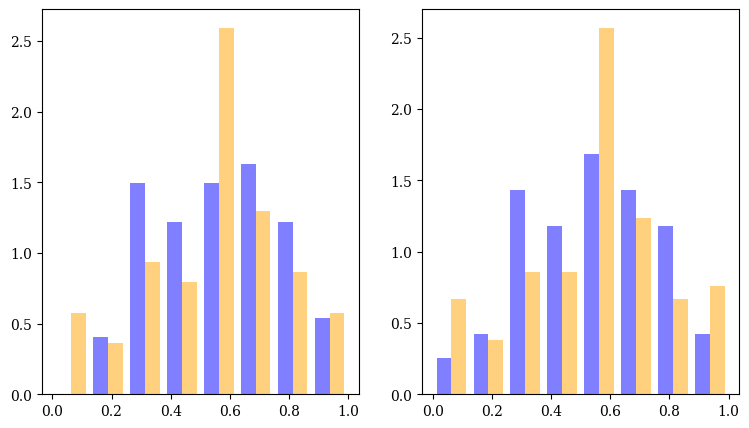

In [35]:
fig, ax = plt.subplots(1,2, figsize=(9,5))

ax[0].hist([QF_nf,QF_f], bins=bins_1, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil, weight_fossil], cumulative=False, density=True)
ax[1].hist([QF_nf1,QF_f1], bins=bins_1, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil_1, weight_fossil_1], cumulative=False, density=True)



In [31]:
binsnf = np.linspace(0, 1, num=len(QF_nf))
binsf = np.linspace(0, 1, num=len(QF_f))

binsnf1 = np.linspace(0, 1, num=len(QF_nf1))
binsf1 = np.linspace(0, 1, num=len(QF_f1))

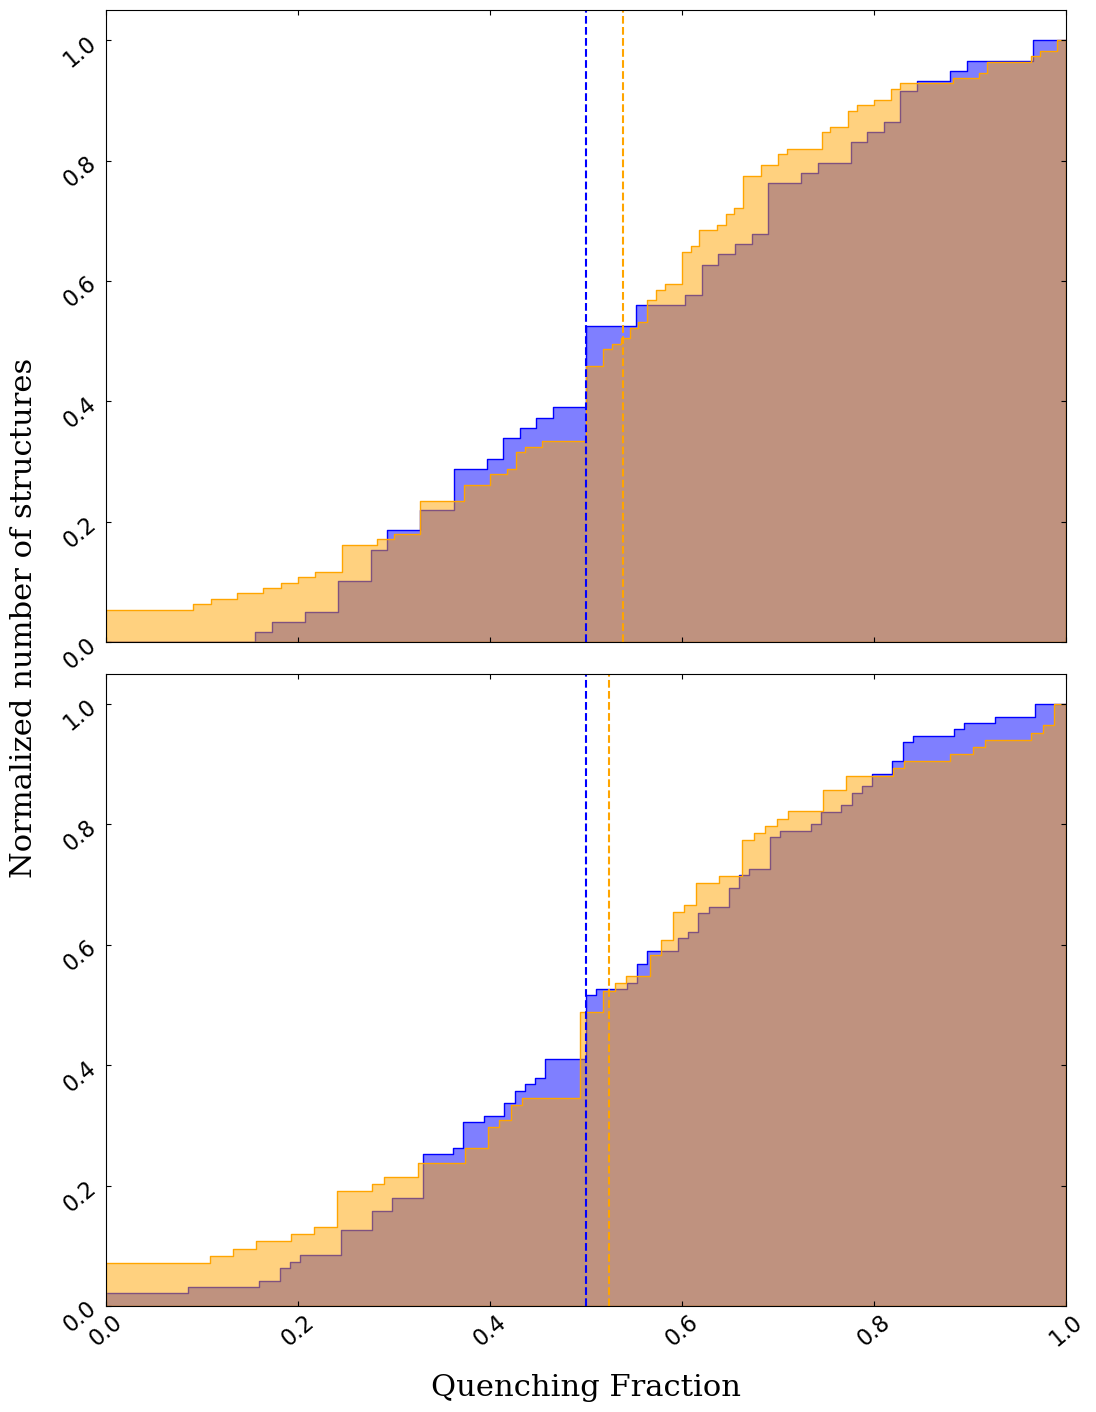

In [32]:
fig, ax = plt.subplots(2,1, figsize=(12,16))
plt.rcParams["font.family"] = "serif"
plt.subplots_adjust(hspace=0.05, wspace=0.01, bottom=0.07, left=0.1)  

sns.histplot(QF_nf, kde=False, label='Non fossil', color='blue', 
             element='step', cumulative=True, bins=binsnf,
             stat='density', ax=ax[0], alpha=0.5)
ax[0].set_xlim(0,1)
sns.histplot(QF_f, kde=False, label='Fossil', color='orange', 
             element='step', cumulative=True, bins=binsf, 
             stat='density', ax=ax[0], alpha=0.5)

#---

sns.histplot(QF_nf1, kde=False, label='Non fossil', color='blue', 
             element='step', cumulative=True, bins=binsnf1, 
             stat='density', ax=ax[1], alpha=0.5)
ax[1].set_xlim(0,1)
sns.histplot(QF_f1, kde=False, label='Fossil', color='orange', 
             element='step', cumulative=True, bins=binsf1, 
             stat='density', ax=ax[1], alpha=0.5)


medianQF_nf = np.median(QF_nf)
medianQF_f = np.median(QF_f)


medianQF_nf1 = np.median(QF_nf1)
medianQF_f1 = np.median(QF_f1)


ax[0].axvline(medianQF_nf, color='blue', linestyle='--')
ax[0].axvline(medianQF_f, color='orange', linestyle='--')
ax[0].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,     
    direction='in',  # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=True,
    left=True,
    right=True,
    labelrotation=40,
    labelsize=16)



ax[1].axvline(medianQF_nf1, color='blue', linestyle='--', label='Median QF non fossil')
ax[1].axvline(medianQF_f1, color='orange', linestyle='--', label='Median QF fossil')
ax[1].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,     
    direction='in',  # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=True,
    labelleft=True,
    left=True,
    right=True,
    labelrotation=40,
    labelsize=16)
ax[1].set_ylabel('')
ax[0].set_ylabel('')

fig.supylabel('Normalized number of structures', fontsize=22)
fig.supxlabel('Quenching Fraction', fontsize=22)
#plt.legend(loc='upper left', fontsize=10)


plt.savefig('/home/tnguser/taller/graficosnuevos/QF.jpg', dpi=300, bbox_inches='tight')

plt.show()

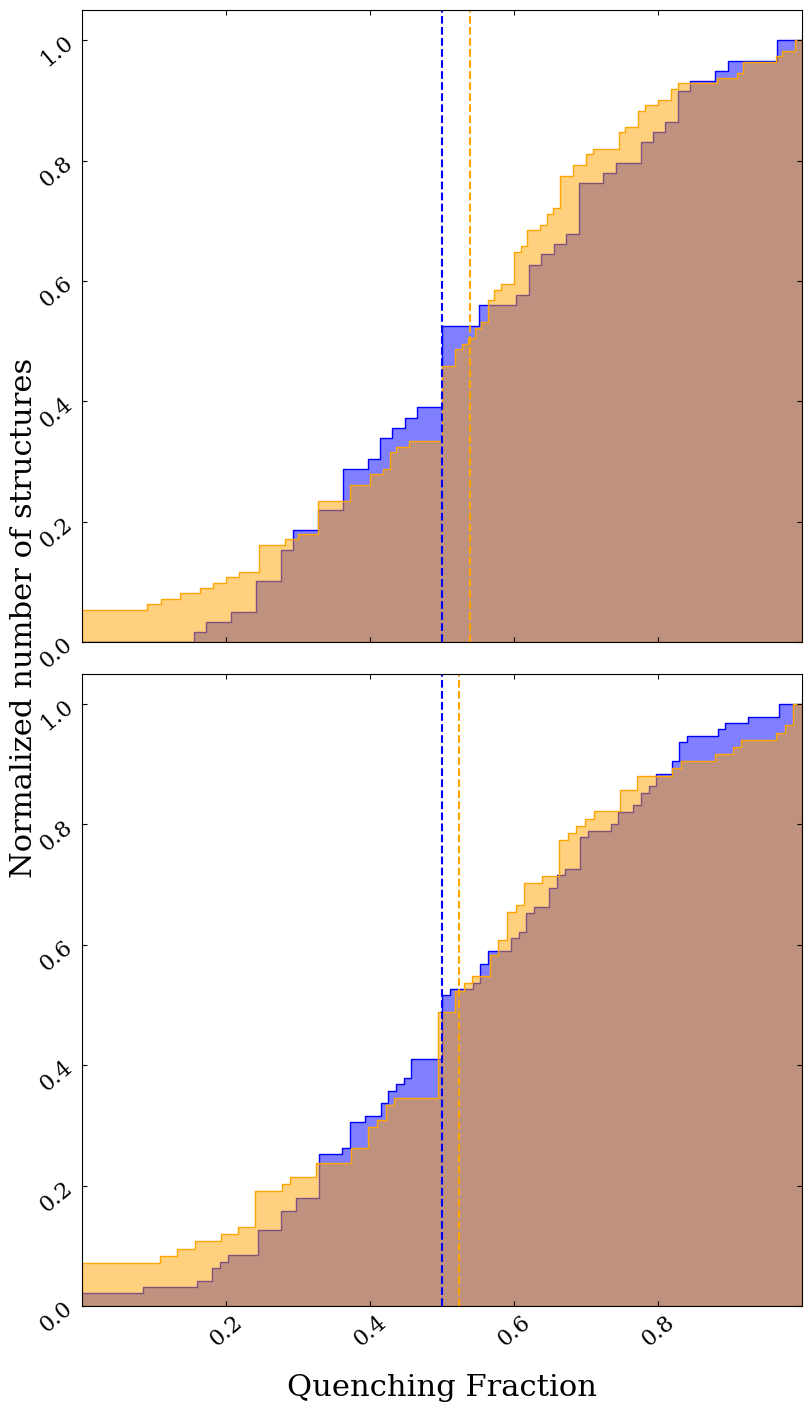

In [33]:
fig, ax = plt.subplots(2,1, figsize=(9,16))
plt.rcParams["font.family"] = "serif"
plt.subplots_adjust(hspace=0.05, wspace=0.01, bottom=0.07, left=0.1)  

# Primer subplot
sns.histplot(QF_nf, kde=False, label='Non fossil', color='blue', 
             element='step', cumulative=True, bins=binsnf,
             stat='density', ax=ax[0], alpha=0.5)
ax[0].set_xlim(0,1)
sns.histplot(QF_f, kde=False, label='Fossil', color='orange', 
             element='step', cumulative=True, bins=binsf, 
             stat='density', ax=ax[0], alpha=0.5)

# Segundo subplot
sns.histplot(QF_nf1, kde=False, label='Non fossil', color='blue', 
             element='step', cumulative=True, bins=binsnf1, 
             stat='density', ax=ax[1], alpha=0.5)
ax[1].set_xlim(0,1)
sns.histplot(QF_f1, kde=False, label='Fossil', color='orange', 
             element='step', cumulative=True, bins=binsf1, 
             stat='density', ax=ax[1], alpha=0.5)

# Medianas
medianQF_nf = np.median(QF_nf)
medianQF_f = np.median(QF_f)
medianQF_nf1 = np.median(QF_nf1)
medianQF_f1 = np.median(QF_f1)

# Líneas de medianas
ax[0].axvline(medianQF_nf, color='blue', linestyle='--')
ax[0].axvline(medianQF_f, color='orange', linestyle='--')
ax[1].axvline(medianQF_nf1, color='blue', linestyle='--', label='Median QF non fossil')
ax[1].axvline(medianQF_f1, color='orange', linestyle='--', label='Median QF fossil')

# Configuración de ticks - PRIMER SUBPLOT
ax[0].tick_params(axis='both', which='both', bottom=True, direction='in',
                 top=True, labelbottom=False, labelleft=True, left=True,
                 right=True, labelrotation=40, labelsize=16)

# Configuración de ticks - SEGUNDO SUBPLOT
ax[1].tick_params(axis='both', which='both', bottom=True, direction='in',
                 top=True, labelbottom=True, labelleft=True, left=True,
                 right=True, labelrotation=40, labelsize=16)

# Configurar los ticks del eje x para ambos subplots
for axis in ax:
    # Obtener los ticks actuales
    xticks = axis.get_xticks()
    # Quitar el primer y último tick
    xticks = xticks[(xticks > axis.get_xlim()[0]) & (xticks < axis.get_xlim()[1])]
    axis.set_xticks(xticks)
    # Opcional: formatear los labels si es necesario
    # axis.set_xticklabels([f"{x:.1f}" for x in xticks])

ax[1].set_ylabel('')
ax[0].set_ylabel('')

fig.supylabel('Normalized number of structures', fontsize=22)
fig.supxlabel('Quenching Fraction', fontsize=22)

plt.savefig('/home/tnguser/taller/graficosnuevos/QF.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [33]:
ks_2samp?

Signature: ks_2samp(data1, data2, alternative='two-sided', method='auto')
Docstring:
Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.

This test compares the underlying continuous distributions F(x) and G(x)
of two independent samples.  See Notes for a description of the available
null and alternative hypotheses.

Parameters
----------
data1, data2 : array_like, 1-Dimensional
    Two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the null and alternative hypotheses. Default is 'two-sided'.
    Please see explanations in the Notes below.
method : {'auto', 'exact', 'asymp'}, optional
    Defines the method used for calculating the p-value.
    The following options are available (default is 'auto'):

      * 'auto' : use 'exact' for small size arrays, 'asymp' for large
      * 'exact' : use exact distribution of test statistic
    

In [34]:
print(ks_2samp(QF_f, QF_nf))
print(ks_2samp(QF_f, QF_nf, alternative='less'))

KstestResult(statistic=0.11482669109787753, pvalue=0.63562359187067, statistic_location=0.6875, statistic_sign=1)
KstestResult(statistic=0.06596426935409987, pvalue=0.6759841027116759, statistic_location=0.5, statistic_sign=-1)


In [35]:
print(ks_2samp(QF_f1, QF_nf1))
print(ks_2samp(QF_f1, QF_nf1, alternative='less'))

KstestResult(statistic=0.07130325814536341, pvalue=0.9595107152713173, statistic_location=0.6875, statistic_sign=1)
KstestResult(statistic=0.06528822055137845, pvalue=0.645134512650364, statistic_location=0.4666666666666667, statistic_sign=-1)
